### Testing Model Assumptions Example 2.6
We generate for the **Income** data the Tukey-Anscombe plot along with the LOESS smoothing curve (see the Figure below).

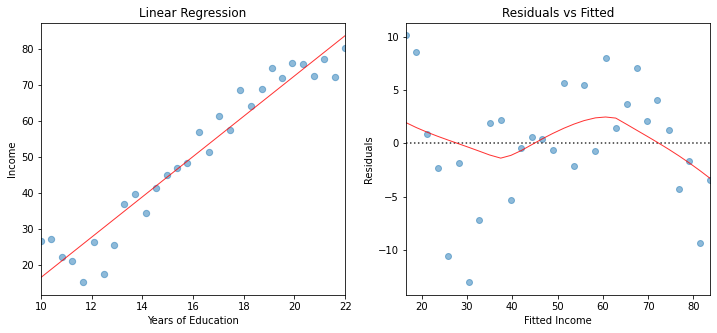

In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from TMA_def import plot_residuals, plot_reg

# Read data
df = pd.read_csv('./data/Income.csv')
x = df['education']
y = df['income']

# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
# Find the predicted values for the original design.
yfit = model.fittedvalues
# Find the Residuals
res = model.resid

# Create Figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
# Plot data using definition from TMA_def
plot_reg(ax1, x, y, model, x_lab="Years of Education",
         y_lab="Income", title="Linear Regression")

# Second Subplot
ax2 = fig.add_subplot(122)
# Plot Residuals using definition from TMA_def
plot_residuals(ax2, yfit, res, n_samp=0, x_lab="Fitted Income")

# Show plots
plt.show()

The red smoothing curve is not passing any more near to the dashed $ r=0 $ line. We are now confronted with the question whether the observed deviation of the smoothing curve from the $ r=0 $ line is plausible when assuming an underlying linear model. In other words, did the observed deviation simply occur due to a random variation or is there a systematic deviation from a linear model?  

If we repeat the measurements, then we would observe a different distribution of the data points and the smoothing curve would follow a different path. If the new smoothing curve then passes next to the $r = 0 $ line, we would not have any reason to question the linearity assumption. 

But how can we decide whether a smoothing curve systematically deviates from the $ r = 0$ line, or when is this just due to a random variation? Generally, this is an expert call based on the magnitude of the deviation and the number of data points which are involved. An elegant way out of these (sometimes difficult) considerations is given by a *resampling approach*.

The principle idea of our resampling approach consists of simulating data points on the basis of the existing data set. For the simulated data points we fit a smoothing curve and add it to the Tukey-Anscombe plot.

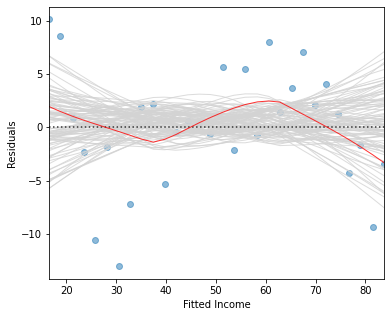

In [3]:
import random

random.seed(0)
n_samp = 100   # Number of resamples

# Create Figure and subplots
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)

# For every random resampling
for i in range(n_samp):
    # 1. resample indices from Residuals
    samp_res_id = random.sample(list(res), len(res))
    # 2. Average of Residuals, smoothed using LOWESS 
    sns.regplot(x=yfit, y=samp_res_id, 
                scatter=False, ci=False, lowess=True, 
                line_kws={'color': 'lightgrey', 'lw': 1, 'alpha': 0.8})
    # 3. Repeat again for n_samples 

# Plot original smoothing curve
sns.residplot(x=yfit, y=res, data=df, 
              lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.xlabel("Fitted Income")
plt.ylabel("Residuals")

# Show plots
plt.show()

**Step 1** We keep the predicted values $\hat{y}_i$ as they are. Then, we 
assign to each $\hat{y}_i$ a new residual $ r^{*}_i $ which we obtained from sampling with replacement among the existing set of $ r_{i} $.

**Step 2** On the basis of the new data pairs $(\hat{y}_i,r^{*}_i)$, a smoothing curve is fitted, and it is added to the Tukey-Anscombe plot as a grey line (the resampled data points are not shown).

**Step 3** The entire process is repeated for a number of times, e.g. one-hundred times.

These simulated smoothing curves illustrate the magnitude which a random deviation
from the $ r = 0 $ line can take on. It may help us to assess the smoothing curve constructed on the basis of the original residuals.

If the underlying regression function $ f $ is linear, then the (grey) band resulting from the simulated smoothing curves should follow the $ r=0 $ line and contain the original (red) smoothing curve fitted on the basis of the original data set.

The red smoothing curve displayed in the Figure above lies within the (grey) band of simulated smoothing curves. We therefore conclude that the wiggly shape of the (red) smoothing curve is not critical. We thus may assume a linear underlying regression function $ f $. 